In [685]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels as sm
import random

att = pd.read_csv('data/Student_Attendance.csv')
growth = pd.read_csv('data/Student_Growth.csv')
dropout = pd.read_csv('data/Student_Dropout.csv')

# Renaming to be concise
att = att.replace('Native Hawaiian/Pacific Islander', 'Hawaiian/Pacific Islander' )
growth = growth.replace('Native Hawaiian/Pacific Islander', 'Hawaiian/Pacific Islander' )
dropout = dropout.replace('Native Hawaiian/Pacific Islander', 'Hawaiian/Pacific Islander' )

# Student Attendance

In [686]:
att.info()
att.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742540 entries, 0 to 742539
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   School Year                   742540 non-null  int64  
 1   District Code                 742540 non-null  int64  
 2   District                      742540 non-null  object 
 3   School Code                   742540 non-null  int64  
 4   Organization                  742540 non-null  object 
 5   Race                          742540 non-null  object 
 6   Gender                        742540 non-null  object 
 7   Grade                         742540 non-null  object 
 8   SpecialDemo                   742540 non-null  object 
 9   Geography                     742540 non-null  object 
 10  SubGroup                      742540 non-null  object 
 11  Rowstatus                     742540 non-null  object 
 12  StudentsChronicallyAbsent     371498 non-nul

,School Year,District Code,District,School Code,Organization,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,Rowstatus,StudentsChronicallyAbsent,Students,PctStudentsChronicallyAbsent,AvgDaysEnrolled,AvgDaysAbsent
0,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,1st Grade,All Students,All Students,Hispanic/Latino/1st Grade,REPORTED,252.0,2125.0,11.86,153.871353,7.427498
1,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,2nd Grade,All Students,All Students,Hispanic/Latino/2nd Grade,REPORTED,216.0,1898.0,11.38,153.746528,6.742560
2,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,3rd Grade,All Students,All Students,Hispanic/Latino/3rd Grade,REPORTED,170.0,1892.0,8.99,156.281407,6.259296
3,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,4th Grade,All Students,All Students,Hispanic/Latino/4th Grade,REPORTED,149.0,1837.0,8.11,156.608605,6.188699
4,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,5th Grade,All Students,All Students,Hispanic/Latino/5th Grade,REPORTED,153.0,1655.0,9.24,157.186303,6.446895
5,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,6th Grade,All Students,All Students,Hispanic/Latino/6th Grade,REPORTED,201.0,1738.0,11.57,157.121711,7.597588
6,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,7th Grade,All Students,All Students,Hispanic/Latino/7th Grade,REPORTED,224.0,1593.0,14.06,157.295468,8.201208
7,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,8th Grade,All Students,All Students,Hispanic/Latino/8th Grade,REPORTED,236.0,1386.0,17.03,157.481969,8.938974
8,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,9th Grade,All Students,All Students,Hispanic/Latino/9th Grade,REPORTED,492.0,1763.0,27.91,149.904634,12.963901
9,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,10th Grade,All Students,All Students,Hispanic/Latino/10th Grade,REPORTED,336.0,1444.0,23.27,157.709569,11.609838


In [687]:
unique = att["Race"].unique().tolist()
print(unique)

# Only looking at entire state
att_state = att[ (att["District Code"] == 0)]

# redacted categories like foster care, does not give data or information on absent rate
# fairly certain, by wording of the dictionary, that 
att_state =  att_state[att_state['Rowstatus'] != 'REDACTED']

#overall only separate by race for now
att_state_all = att_state[(att_state['Grade'] == 'All Students') &
                      (att_state['Gender'] == 'All Students') &
                      (att_state['SpecialDemo'] == 'All Students') ]

#print(str(att_state_all.loc[ att_state_all['SubGroup'] == 'All Students' , ['School Year','Students'] ]))
att_state_all = att_state_all[ att_state_all['SubGroup'] != 'All Students' ]

#att_state_all = att_state_all.sort_values('PctStudentsChronicallyAbsent')

#att_state_all = att_state_all.set_index('SubGroup')
#ax = att_state_all[att_state_all['School Year'] == 2015].plot.bar(y='PctStudentsChronicallyAbsent', rot=90)

# only data from 2015-2019
att_state_all.head()

['Hispanic/Latino', 'All Students', 'White', 'Native American', 'African American', 'Asian American', 'Multi-Racial', 'Hawaiian/Pacific Islander']


,School Year,District Code,District,School Code,Organization,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,Rowstatus,StudentsChronicallyAbsent,Students,PctStudentsChronicallyAbsent,AvgDaysEnrolled,AvgDaysAbsent
12,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,All Students,All Students,All Students,Hispanic/Latino,REPORTED,3414.0,21920.0,15.57,155.496565,8.703340
327,2015,0,State of Delaware,0,State of Delaware,Native American,All Students,All Students,All Students,All Students,Native American,REPORTED,107.0,577.0,18.54,157.167230,9.878378
566,2015,0,State of Delaware,0,State of Delaware,African American,All Students,All Students,All Students,All Students,African American,REPORTED,8462.0,44747.0,18.91,153.381503,9.189935
895,2015,0,State of Delaware,0,State of Delaware,White,All Students,All Students,All Students,All Students,White,REPORTED,8927.0,65198.0,13.69,161.483502,8.661167
1224,2015,0,State of Delaware,0,State of Delaware,Asian American,All Students,All Students,All Students,All Students,Asian,REPORTED,388.0,5217.0,7.44,158.321772,6.045994


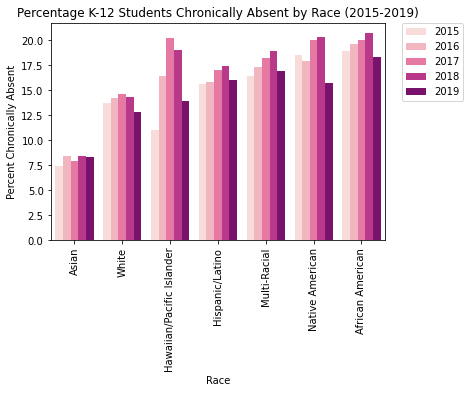

In [688]:
plotOrder = ['Asian', 'White', 'Hawaiian/Pacific Islander', 'Hispanic/Latino','Multi-Racial', 'Native American','African American']

att_plot = sns.barplot(x = 'SubGroup',
                        y = 'PctStudentsChronicallyAbsent',
                        data = att_state_all,
                       hue = 'School Year',
                       palette = "RdPu",
                       order = plotOrder
                      )
                       
for item in att_plot.get_xticklabels(): item.set_rotation(90)
att_plot.set(xlabel='Race', ylabel="Percent Chronically Absent", title="Percentage K-12 Students Chronically Absent by Race (2015-2019)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

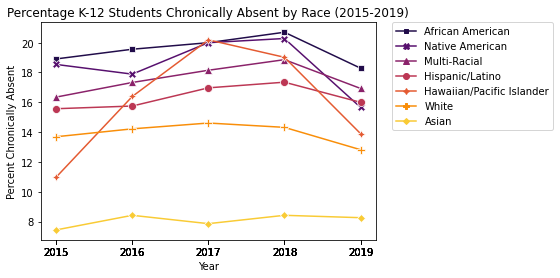

In [689]:
plotOrderReversed = plotOrder[::-1]

att_plot = sns.lineplot(x = 'School Year',
                        y = 'PctStudentsChronicallyAbsent',
                        data = att_state_all,
                        hue = 'SubGroup',
                        style = 'SubGroup',
                        markers = True,
                        dashes = False,
                        markersize = 8,
                        hue_order = plotOrderReversed,
                        palette = 'inferno'
                      )


att_plot.set_xticks(att_state_all['School Year'].values)
att_plot.set(xlabel='Year', ylabel="Percent Chronically Absent", title="Percentage K-12 Students Chronically Absent by Race (2015-2019)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

### Observations
* Some of the higher chronically absent percentages drop quite a bit from 2018 to 2019
* The hawaiian/pacific islander percentages are really strange, doesn't follow other trends
    * Could be fluctuation due to low numbers?
    * Maybe error in data collection?
    * Look into later
* Across the years, none of the lines have really crossed each other except whatever is happening with hawaiian/pacific islander and one dip for native american students in 2019
    * African American students consistently have the highest percentage of chronic absence
    * Asians and Whites consistently have the lowest percentage of chronic absences
* Mind that other factors besides inequality may affect these rates
    * Such as cultural emphasis on education 
    * Possible changes or hiccups in data collection
    

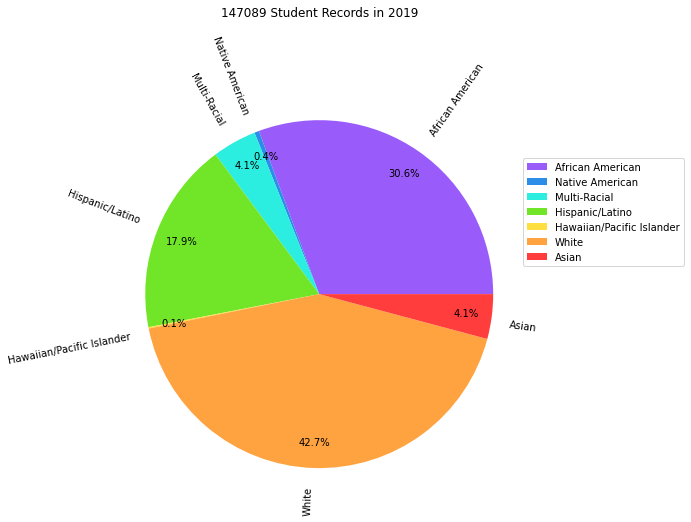

Total number of students: 147089

Number of Hawaiian/Pacific Islander students per year
        School Year  Students
1490           2015     164.0
119311         2016     183.0
240457         2017     208.0
363117         2018     205.0
488134         2019     187.0

Number of Native American students per year
        School Year  Students
327            2015     577.0
118156         2016     559.0
239211         2017     550.0
361868         2018     577.0
486853         2019     632.0

Number of Multi-Racial students per year
        School Year  Students
1668           2015    4048.0
119388         2016    4575.0
240489         2017    5019.0
363283         2018    5525.0
488367         2019    6035.0


In [690]:
pie_df = att_state_all[['SubGroup','Students','School Year']]
pie_df = pie_df.set_index('SubGroup')
pie_colors = ['#995cfa','#2c8de8','#2bede0',  '#71e629', '#ffdf40','#ffa340','#ff3d3d']

att_pie_2019 = pie_df[pie_df['School Year'] == 2019].reindex(plotOrderReversed).plot.pie( 
    y='Students', 
    figsize=(5, 5),
    labels = plotOrderReversed,
    autopct='%1.1f%%',
    pctdistance=.85,
    radius = 1.6,
    rotatelabels = True,
    ylabel = '',
    colors = pie_colors
)


totalStudents = str(int(pie_df[pie_df['School Year'] == 2019]['Students'].sum() ) )

plt.title( totalStudents + " Student Records in 2019", y=1.5)
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0)
plt.show()


print ( "Total number of students: " +  totalStudents)

print("\nNumber of Hawaiian/Pacific Islander students per year")
print(att_state_all.loc[ att_state_all["SubGroup"] == "Hawaiian/Pacific Islander", ['School Year','Students'] ] )

print("\nNumber of Native American students per year")
print(att_state_all.loc[ att_state_all["SubGroup"] == "Native American", ['School Year','Students'] ] )

print("\nNumber of Multi-Racial students per year")
print(att_state_all.loc[ att_state_all["SubGroup"] == "Multi-Racial", ['School Year','Students'] ] )

### Note
* Very small percentage of hawaiian/pacific islander students - .1%
* Second smallest is native american students - .4%
    * 160 - 200 ish hawaiian/pacific islander students every year
    * The number of 4% jumps in attendance across years seems like it could be due to low numbers
    * That's like a fluctuation of 6-8 students
    * Could probably test this more
* Realizing this data does not actually give individual attendance records or anything, test score data is probably similar.
    * Can't particularly use any correlation tests for individ students, could by race maybeee
    * https://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/
    * ~~Proportion test for significance, poisson? ~~
    * More like 2 sample proportion z-test?

In [691]:
state_2019 = att_state_all[ att_state_all["School Year"] == 2019]

def getCell(sg, column):
    return state_2019[state_2019["SubGroup"] == sg ][column].values[0]

absent_white = getCell("White", "StudentsChronicallyAbsent")
total_white = getCell("White", "Students")
absent_asian = getCell("Asian", "StudentsChronicallyAbsent")
total_asian = getCell("Asian", "Students")
absent_aa = getCell("African American", "StudentsChronicallyAbsent")
total_aa = getCell("African American", "Students")

absent_hl = getCell("Hispanic/Latino", "StudentsChronicallyAbsent")
total_hl = getCell("Hispanic/Latino", "Students")

    

#test_proportions_2indep(count1, nobs1, count2, nobs2, value=None, method=None, compare='diff', 
                        # alternative='two-sided', correction=True, return_results=True)

print("\nWhite - Asian")
print( sm.stats.proportion.test_proportions_2indep(absent_white, total_white, absent_asian, total_asian) )
# z = 12.062, p = 1.66 ^ -33, p very low, reject null hypothesis that there is no difference, is statistically significant

print("\nWhite - African American")
print( sm.stats.proportion.test_proportions_2indep(absent_white, total_white, absent_aa, total_aa) )

print("\nWhite - Hispanic/Latino")
print( sm.stats.proportion.test_proportions_2indep(absent_white, total_white, absent_hl, total_hl) )

print(absent_white, total_white, absent_hl, total_hl)


White - Asian
statistic = 12.062425802388365
pvalue = 1.6679657957038855e-33
compare = diff
method = agresti-caffo
diff = 0.04559379012287533
ratio = 1.552100994285532
odds_ratio = 1.6332712502838764
variance = 1.4208865338032699e-05
alternative = two-sided
value = 0
tuple = (12.062425802388365, 1.6679657957038855e-33)

White - African American
statistic = -24.230293179927898
pvalue = 1.0669799084361401e-129
compare = diff
method = agresti-caffo
diff = -0.0546949627377957
ratio = 0.7009097342159121
odds_ratio = 0.6569372840816317
variance = 5.095803477954672e-06
alternative = two-sided
value = 0
tuple = (-24.230293179927898, 1.0669799084361401e-129)

White - Hispanic/Latino
statistic = -12.137032085280147
pvalue = 6.722026136668268e-34
compare = diff
method = agresti-caffo
diff = -0.03185278275113196
ratio = 0.8009560718458503
odds_ratio = 0.7716925009223886
variance = 6.8936919576300546e-06
alternative = two-sided
value = 0
tuple = (-12.137032085280147, 6.722026136668268e-34)
8046.0 

### Observations
* The differences tested are all statistically significant, unless I'm doing the test wrong
* So the difference in chronic attendance rates/proportions are likely not by chance

---


# Student Dropout

In [692]:
dropout.info()
dropout.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24056 entries, 0 to 24055
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   School Year    24056 non-null  int64  
 1   District Code  24056 non-null  int64  
 2   District       24056 non-null  object 
 3   School Code    24056 non-null  int64  
 4   Organization   24056 non-null  object 
 5   Race           24056 non-null  object 
 6   Gender         24056 non-null  object 
 7   Grade          24056 non-null  object 
 8   SpecialDemo    24056 non-null  object 
 9   Geography      24056 non-null  object 
 10  SubGroup       24056 non-null  object 
 11  RowStatus      24056 non-null  object 
 12  Dropouts       3733 non-null   float64
 13  Students       18628 non-null  float64
 14  PctDropouts    3733 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 2.8+ MB


,School Year,District Code,District,School Code,Organization,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,RowStatus,Dropouts,Students,PctDropouts
0,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,9th Grade,All Students,All Students,Hispanic/Latino/9th Grade,REPORTED,71.0,1653.0,4.3
1,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,10th Grade,All Students,All Students,Hispanic/Latino/10th Grade,REPORTED,47.0,1347.0,3.5
2,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,11th Grade,All Students,All Students,Hispanic/Latino/11th Grade,REPORTED,20.0,1021.0,2.0
3,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,Twelfth,All Students,All Students,Hispanic/Latino/Twelfth,REPORTED,20.0,965.0,2.1
4,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,All Students,All Students,All Students,Hispanic/Latino,REPORTED,158.0,4986.0,3.2


In [693]:
do_state = dropout[ dropout["District Code"] == 0]

do_state = do_state[(do_state['Grade'] == 'All Students') &
                      (do_state['Gender'] == 'All Students') &
                      (do_state['SpecialDemo'] == 'All Students') &
                      (do_state['SubGroup'] != 'All Students')]
do_state.head(30)

,School Year,District Code,District,School Code,Organization,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,RowStatus,Dropouts,Students,PctDropouts
4,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,All Students,All Students,All Students,Hispanic/Latino,REPORTED,158.0,4986.0,3.2
70,2015,0,State of Delaware,0,State of Delaware,Native American,All Students,All Students,All Students,All Students,Native American,REPORTED,6.0,151.0,4.0
88,2015,0,State of Delaware,0,State of Delaware,African American,All Students,All Students,All Students,All Students,African American,REPORTED,358.0,12773.0,2.8
154,2015,0,State of Delaware,0,State of Delaware,White,All Students,All Students,All Students,All Students,White,REPORTED,326.0,19659.0,1.7
219,2015,0,State of Delaware,0,State of Delaware,Asian American,All Students,All Students,All Students,All Students,Asian,REDACTED,NaN,1379.0,NaN
242,2015,0,State of Delaware,0,State of Delaware,Hawaiian/Pacific Islander,All Students,All Students,All Students,All Students,Hawaiian/Pacific Islander,REDACTED,NaN,40.0,NaN
262,2015,0,State of Delaware,0,State of Delaware,Multi-Racial,All Students,All Students,All Students,All Students,Multi-Racial,REPORTED,13.0,662.0,2.0
6507,2016,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,All Students,All Students,All Students,Hispanic/Latino,REPORTED,119.0,5391.0,2.2
6576,2016,0,State of Delaware,0,State of Delaware,Native American,All Students,All Students,All Students,All Students,Native American,REDACTED,NaN,153.0,NaN
6597,2016,0,State of Delaware,0,State of Delaware,African American,All Students,All Students,All Students,All Students,African American,REPORTED,239.0,12878.0,1.9


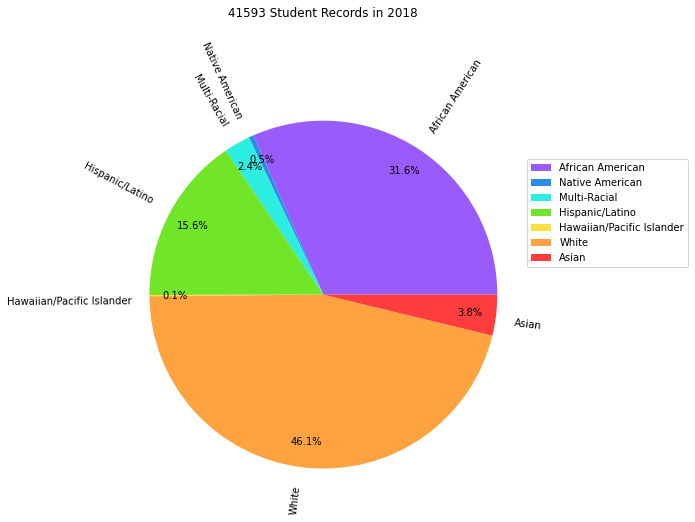

Total number of students: 41593


In [694]:
plotOrder = ['Asian', 'White', 'Hawaiian/Pacific Islander' , 'Hispanic/Latino','Multi-Racial', 'Native American','African American']
plotOrderReversed = plotOrder[::-1]

pie_df = do_state[['SubGroup','Students','School Year']]
pie_df = do_state.set_index('SubGroup')
pie_colors = ['#995cfa','#2c8de8','#2bede0',  '#71e629', '#ffdf40','#ffa340','#ff3d3d']

do_pie_2018 = pie_df[pie_df['School Year'] == 2018].reindex(plotOrderReversed).plot.pie( 
    y='Students', 
    figsize=(5, 5),
    labels = plotOrderReversed,
    autopct='%1.1f%%',
    pctdistance=.85,
    radius = 1.6,
    rotatelabels = True,
    ylabel = '',
    colors = pie_colors
)

totalStudents = str(int(pie_df[pie_df['School Year'] == 2018]['Students'].sum() ) )

plt.title( totalStudents + " Student Records in 2018", y=1.5)
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0)
plt.show()


print ( "Total number of students: " +  totalStudents)

#print("\nNumber of Native American students per year")
#print(att_state_all.loc[ att_state_all["SubGroup"] == "Native American", ['School Year','Students'] ] )

### Notes
* Unsure why, but the dropout info for Asians, Hawaiian/Pacific Islander, and Native Americans is mostly redacted
    * Possibly no one dropping out, but why not include the info?
    * Dictionary says redacted may be to comply with privacy laws??
* This data only goes up to 2018
* The percentage of students across races looks relatively the same
    * Though the sample is smaller for this dataset, I wonder why

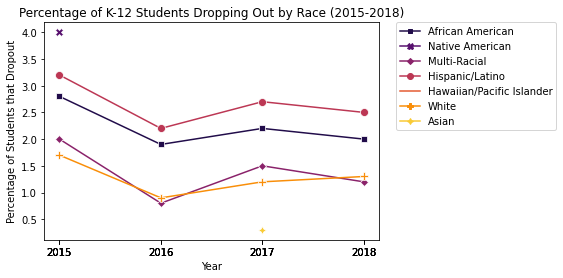

In [695]:
# get rid of all rows without dropout rate report
do_state =  do_state[do_state['RowStatus'] != 'REDACTED']

# same order, sans hawaiian / pacific islander because redacted (no dropout numbers reported)
doOrder = ['Asian', 'White', 'Hispanic/Latino','Multi-Racial', 'Native American','African American']
doOrderReversed = plotOrder[::-1]

do_plot = sns.lineplot(x = 'School Year',
                        y = 'PctDropouts',
                        data = do_state,
                        hue = 'SubGroup',
                        style = 'SubGroup',
                        markers = True,
                        dashes = False,
                        markersize = 8,
                        hue_order = doOrderReversed,
                        palette = 'inferno'
                      )


do_plot.set_xticks(do_state['School Year'].values)
do_plot.set(xlabel='Year', ylabel="Percentage of Students that Dropout", title="Percentage of K-12 Students Dropping Out by Race (2015-2018)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

### Observations
* Again the lines, ignoring multi-racial students, don't really cross one another across four years
    * Probably another statistically significant difference here?
* With what I read about the disparity of African American students' test scores, I'm surprised to see that Hispanic/Latino students are dropping out at a consistently higher rate 
    * I wonder if there've been any papers focusing on this 